In [1]:
import os
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from statannot import add_stat_annotation

In [2]:
## Load tweet files
df=pd.read_csv('/data/tweets.csv') ##original tweets only. Look for tweet_type=='original' in tweet objects

In [ ]:
uncivil=['anger','new_hate','toxicity_bin','obscene_bin','insult_bin']

## Tweets over time

In [ ]:
def smooth(x):
    return x.rolling(window=3, min_periods=1).mean()

In [ ]:
df['date']=df['str_date'].apply(pd.Timestamp)
umean=df.groupby(['date','political_gen'])[uncivil].sum().reset_index()
ucount=df.groupby(['date','political_gen']).size().reset_index(name='count')
lib_count=ucount[ucount['political_gen']==0]
con_count=ucount[ucount['political_gen']==1]
lib_mean=umean[umean['political_gen']==0]
con_mean=umean[umean['political_gen']==1]

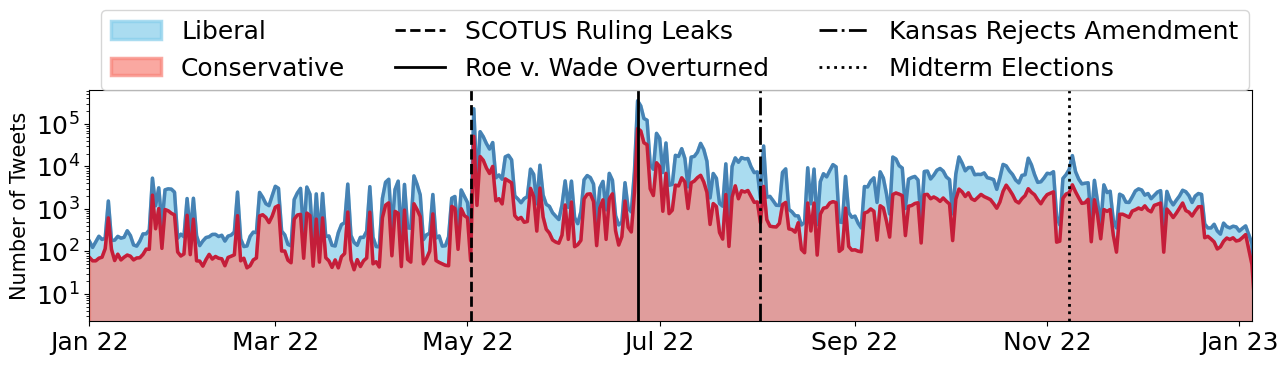

In [ ]:
plt.figure(figsize=(15,3))
import matplotlib.dates as mdates
plt.rcParams['axes.grid'] = False
plt.plot(lib_count['date'],lib_count['count'],color='steelblue',lw=2.5)
plt.plot(con_count['date'],con_count['count'],color='#C41E3A',lw=2.5)
plt.fill_between(lib_count['date'],lib_count['count'],color='skyblue',lw=2.5,label='Liberal',alpha=0.7)
plt.fill_between(con_count['date'],con_count['count'],color='#F88379',lw=2.5,label='Conservative',alpha=0.7)
plt.axvline(x=pd.Timestamp("2022-05-02"),color='black', ls='--', lw=2, label='SCOTUS Ruling Leaks')
plt.axvline(x=pd.Timestamp("2022-06-24"),color='black', ls='-', lw=2, label='Roe v. Wade Overturned')
plt.axvline(x=pd.Timestamp("2022-08-02"),color='black', ls='-.', lw=2, label='Kansas Rejects Amendment')
plt.axvline(x=pd.Timestamp("2022-11-08"),color='black', ls=':', lw=2, label='Midterm Elections')
plt.yticks([0,0.2,0.4,0.6],fontsize=18)
plt.xticks(fontsize=18)
date_format = mdates.DateFormatter('%b %y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.legend(loc=(0.01,1),ncol=3,fontsize=18)
plt.xlim(pd.Timestamp('2022-01-01'),pd.Timestamp('2023-01-05'))
plt.ylabel('Number of Tweets',fontsize=15)
plt.yscale('log')
plt.savefig('tweets_over_time.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
df['date']=df['str_date'].apply(pd.Timestamp)
uncivil=['anger','toxicity_bin','obscene_bin','insult_bin','new_hate']
lib=df[df['political_gen']==0]
con=df[df['political_gen']==1]

lib_mean=lib.groupby('str_date')[uncivil].mean().reset_index()
con_mean=con.groupby('str_date')[uncivil].mean().reset_index()

In [ ]:
##Function to perform 3-day smoothing
def smooth(x):
    return x.rolling(window=3, min_periods=1).mean()

In [ ]:
ylim_dict={
    'anger':[0,0.2,0.4,0.6],
    'new_hate':[0,0.05,0.1,0.15,0.2],
    'toxicity_bin':[0,0.05,0.1,0.15,0.2],
    'obscene_bin':[0,0.05,0.1,0.15,0.2],
    'insult_bin':[0,0.05,0.1,0.15,0.2]
}

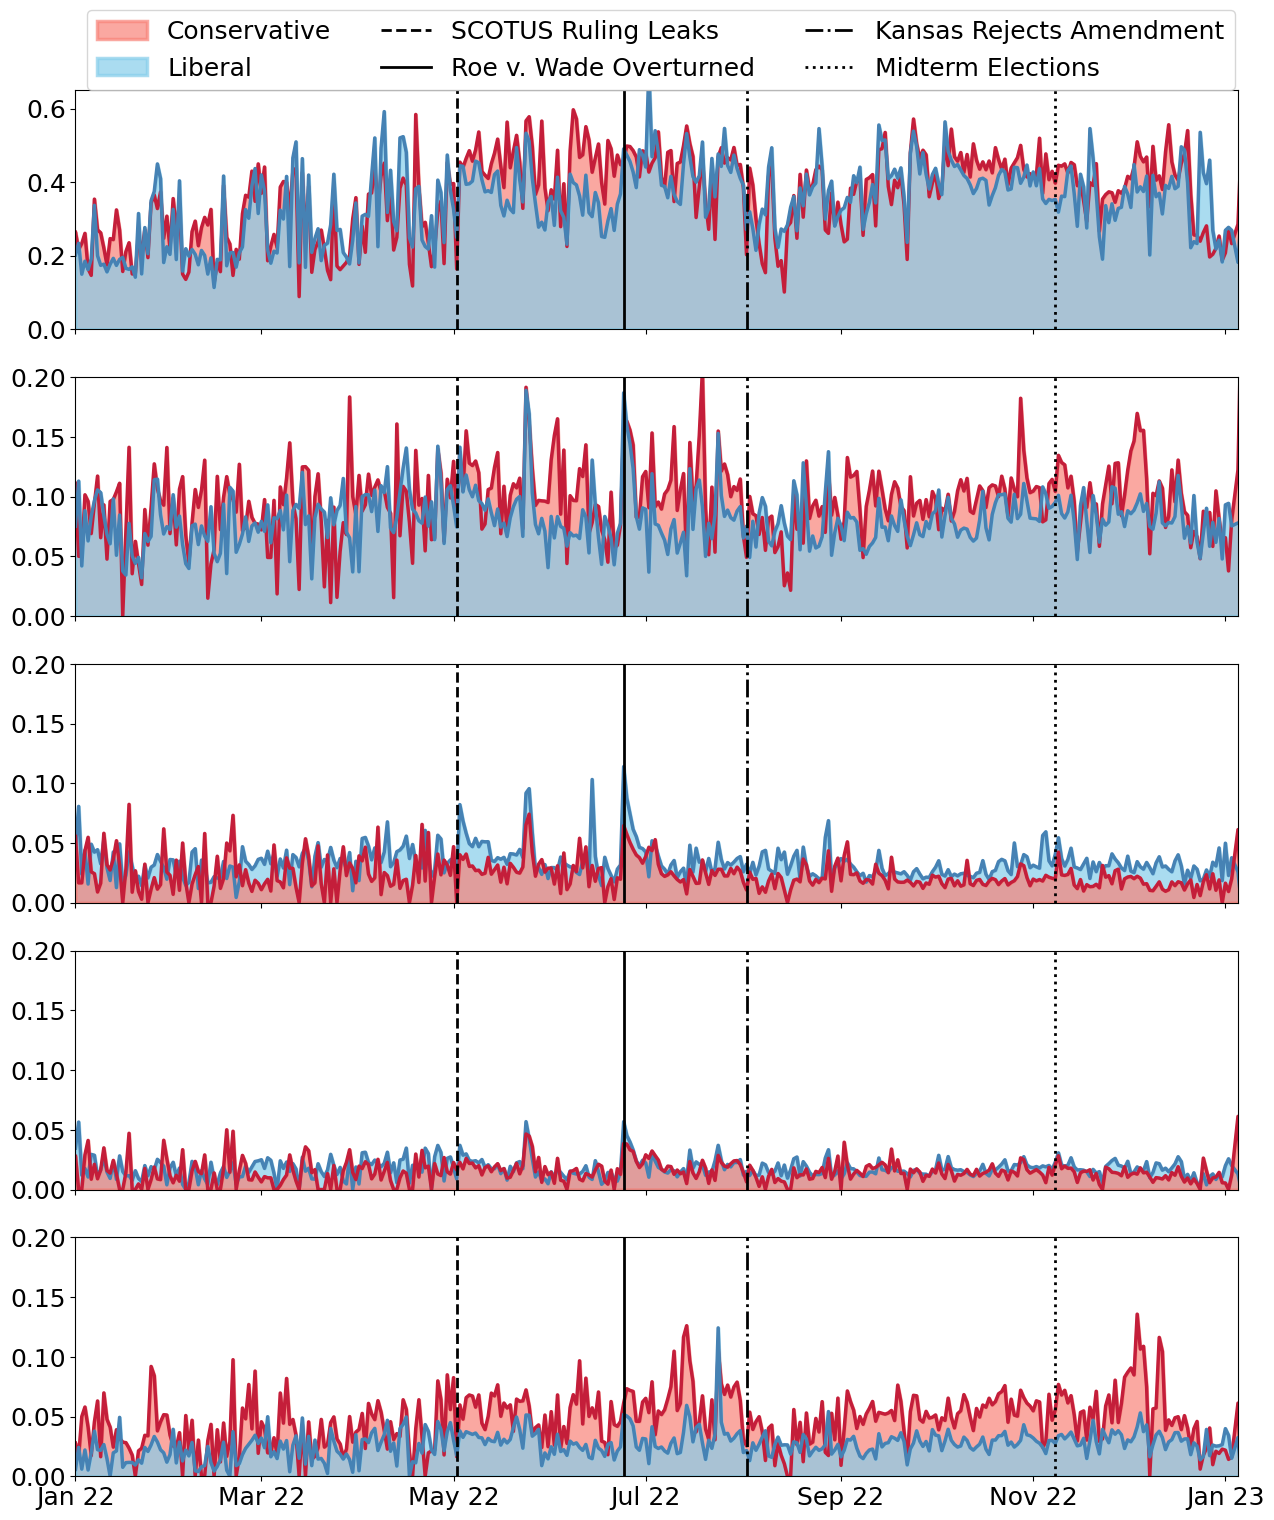

In [ ]:
import matplotlib.dates as mdates
lib_mean['date']=lib_mean['str_date'].apply(pd.Timestamp)
con_mean['date']=con_mean['str_date'].apply(pd.Timestamp)
fig, axes = plt.subplots(5, 1, sharex=True, figsize=(15, 18))
ct=0
for u in uncivil:
    plt.sca(axes[ct])
    if u in ['obscene_bin','insult_bin']:
        plt.plot(lib_mean['date'],lib_mean[u],color='steelblue',lw=2.5)
        plt.plot(con_mean['date'],con_mean[u],color='#C41E3A',lw=2.5)
        plt.fill_between(lib_mean['date'],lib_mean[u],color='skyblue',lw=2.5,label='Liberal',alpha=0.7)
        plt.fill_between(con_mean['date'],con_mean[u],color='#F88379',lw=2.5,label='Conservative',alpha=0.7)
    else:
        
        plt.plot(con_mean['date'],con_mean[u],color='#C41E3A',lw=2.5)
        plt.plot(lib_mean['date'],lib_mean[u],color='steelblue',lw=2.5)
        
        plt.fill_between(con_mean['date'],con_mean[u],color='#F88379',lw=2.5,label='Conservative',alpha=0.7)
        plt.fill_between(lib_mean['date'],lib_mean[u],color='skyblue',lw=2.5,label='Liberal',alpha=0.7)
    plt.axvline(x=pd.Timestamp("2022-05-02"),color='black', ls='--', lw=2, label='SCOTUS Ruling Leaks')
    plt.axvline(x=pd.Timestamp("2022-06-24"),color='black', ls='-', lw=2, label='Roe v. Wade Overturned')
    plt.axvline(x=pd.Timestamp("2022-08-02"),color='black', ls='-.', lw=2, label='Kansas Rejects Amendment')
    plt.axvline(x=pd.Timestamp("2022-11-08"),color='black', ls=':', lw=2, label='Midterm Elections')
    plt.yticks(ylim_dict[u],fontsize=18)
    plt.xticks(fontsize=18)
    if u=='anger':
        plt.ylim([min(ylim_dict[u]),max(ylim_dict[u])+0.05])
    else:
        plt.ylim([min(ylim_dict[u]),max(ylim_dict[u])])
    date_format = mdates.DateFormatter('%b %y')
    plt.gca().xaxis.set_major_formatter(date_format)
    if ct==0:
        plt.legend(loc=(0.01,1),ncol=3,fontsize=18)
    ct+=1
    plt.xlim(pd.Timestamp('2022-01-01'),pd.Timestamp('2023-01-05'))
plt.savefig('uncivil_over_time.pdf',dpi=300,bbox_inches='tight')
plt.show()

## Frames over time

In [25]:
## Read tweets identified as relevant to a frame - religion, bodily autonomy, fetal personhood, women's health and exceptions
rel=pd.read_csv('/data/religion.csv')
autonomy=pd.read_csv('/data/autonomy.csv')
fetal_rights=pd.read_csv('/data/fetal_rights.csv')
health=pd.read_csv('/data/health.csv')
excep=pd.read_csv('/data/exceptions.csv')

In [28]:
## Compute daily usage of each frame
day_counts=df[['id','str_date','political_gen']].groupby(['str_date','political_gen']).size().reset_index(name='total')
rel_count=rel[['id','str_date','political_gen']].groupby(['str_date','political_gen']).size().reset_index(name='count')
autonomy_count=autonomy[['id','str_date','political_gen']].groupby(['str_date','political_gen']).size().reset_index(name='count')
fetal_rights_count=fetal_rights[['id','str_date','political_gen']].groupby(['str_date','political_gen']).size().reset_index(name='count')
health_count=health[['id','str_date','political_gen']].groupby(['str_date','political_gen']).size().reset_index(name='count')
excep_count=excep[['id','str_date','political_gen']].groupby(['str_date','political_gen']).size().reset_index(name='count')

<ipython-input-57-27a211a98f60>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l['frac']=l[names[ct]]/l['total']
<ipython-input-57-27a211a98f60>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['frac']=c[names[ct]]/c['total']
<ipython-input-57-27a211a98f60>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

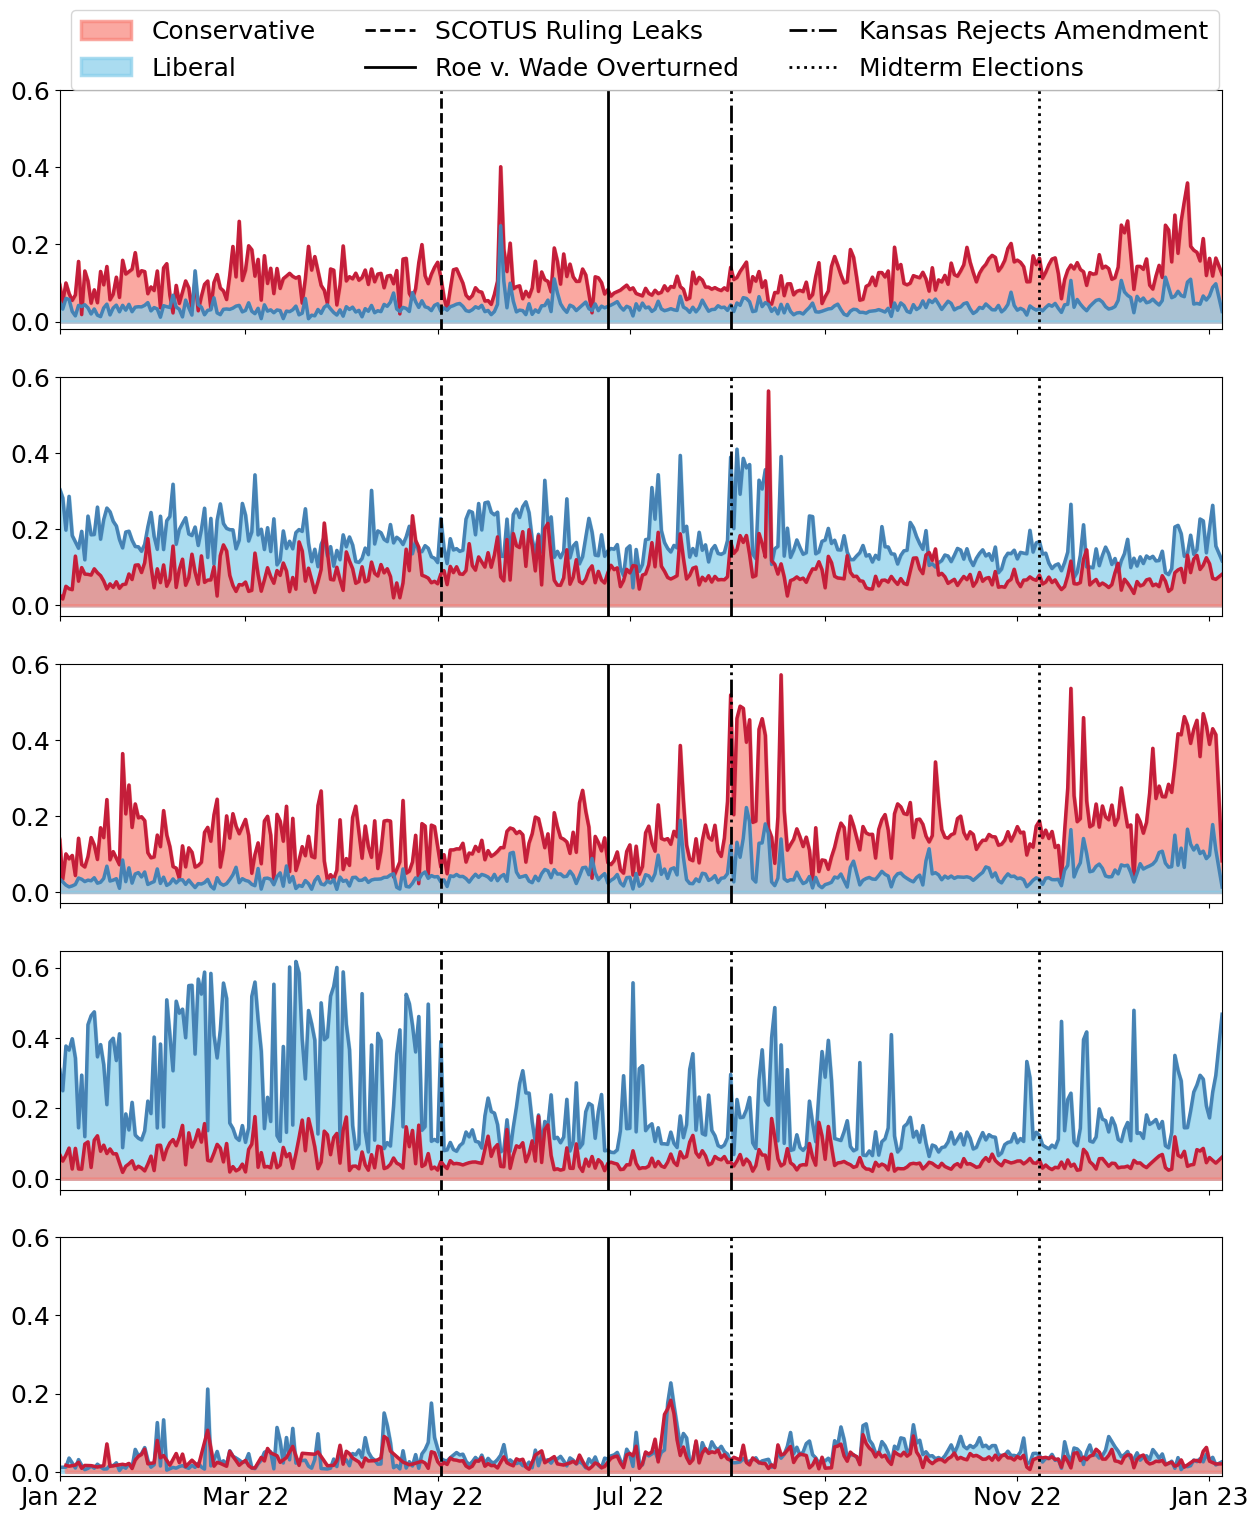

In [ ]:
merged=df.groupby(['str_date','political_gen']).size().reset_index(name='total')[:738]
total_counts=df.groupby(['str_date','political_gen']).size().reset_index(name='total')[:738]
names=['rel','autonomy','fetal_rights','health','excep']
ct=0
fig, axes = plt.subplots(5, 1, sharex=True, figsize=(15, 18))
for data in [rel,autonomy,fetal_rights,health,excep]:
    cols=list(set(uncivil)-set(list(data)))
    data=data.merge(df[['id']+cols],on='id')
    lib=data[data['political_gen']==0]
    con=data[data['political_gen']==1]
    
    lib_means=lib.groupby('str_date').mean().reset_index()
    con_means=con.groupby('str_date').mean().reset_index()
    
    rel_counts=data.groupby(['str_date','political_gen']).size().reset_index(name=names[ct])[:738]
    plt.sca(axes[ct])
    rel_counts=rel_counts.merge(total_counts,on=['str_date','political_gen'])
    merged=merged.merge(rel_counts,on=['str_date','political_gen'])
    rel_counts['date']=rel_counts['str_date'].apply(pd.Timestamp)
    l=rel_counts[rel_counts['political_gen']==0]
    c=rel_counts[rel_counts['political_gen']==1]

    l['frac']=l[names[ct]]/l['total']
    c['frac']=c[names[ct]]/c['total']
    if ct in [0,2]:
        plt.plot(c['date'],c['frac'],color='#C41E3A',lw=2.5)
        plt.plot(l['date'],l['frac'],color='steelblue',lw=2.5)
        plt.fill_between(c['date'],c['frac'],color='#F88379',lw=2.5,label='Conservative',alpha=0.7)
        plt.fill_between(l['date'],l['frac'],color='skyblue',lw=2.5,label='Liberal',alpha=0.7)
    else:
        
        plt.plot(l['date'],l['frac'],color='steelblue',lw=2.5)
        plt.plot(c['date'],c['frac'],color='#C41E3A',lw=2.5)
        
        plt.fill_between(l['date'],l['frac'],color='skyblue',lw=2.5,label='Liberal',alpha=0.7)
        plt.fill_between(c['date'],c['frac'],color='#F88379',lw=2.5,label='Conservative',alpha=0.7)
    plt.axvline(x=pd.Timestamp("2022-05-02"),color='black', ls='--', lw=2, label='SCOTUS Ruling Leaks')
    plt.axvline(x=pd.Timestamp("2022-06-24"),color='black', ls='-', lw=2, label='Roe v. Wade Overturned')
    plt.axvline(x=pd.Timestamp("2022-08-02"),color='black', ls='-.', lw=2, label='Kansas Rejects Amendment')
    plt.axvline(x=pd.Timestamp("2022-11-08"),color='black', ls=':', lw=2, label='Midterm Elections')
    plt.yticks([0,0.2,0.4,0.6],fontsize=18)
    plt.xticks(fontsize=18)
    date_format = mdates.DateFormatter('%b %y')
    plt.gca().xaxis.set_major_formatter(date_format)
    if ct==0:
        plt.legend(loc=(0.01,1),ncol=3,fontsize=18)
    ct+=1
    plt.xlim(pd.Timestamp('2022-01-01'),pd.Timestamp('2023-01-05'))
plt.savefig('frame_activity.pdf',dpi=300,bbox_inches='tight')
plt.show()

## Comnparing Hostile Expression in Frames

In [ ]:
columns=['id','anger', 'toxicity_bin', 'obscene_bin', 'insult_bin','new_hate']
df=df[columns]

In [ ]:
data_arr=[rel,autonomy,fetal_rights,health,excep]
names=['Religion','Bodily Autonomy','Fetal Personhood',"Women's Health",'Exceptions']
affect=['anger', 'toxicity_bin', 'obscene_bin', 'insult_bin','new_hate']

In [ ]:
from scipy.stats import mannwhitneyu
names=['Religion','Bodily Autonomy','Fetal Rights',"Women's Health",'Exceptions']
res=[]
l_em={}
c_em={}
ct=0
for data in data_arr:
    cols=list(set(affect)-set(list(data)))
    subdf=df[['id']+cols]
    data=data.merge(subdf,on='id')
    l=data[data['political_gen']==0]
    c=data[data['political_gen']==1]
    l_day=l[['str_date']+affect].groupby('str_date').mean().reset_index()
    c_day=c[['str_date']+affect].groupby('str_date').mean().reset_index()
    for u in affect:
        if l_day[u].mean()<c_day[u].mean():
            #print(u,l_day[u].median(),c_day[u].median(),mannwhitneyu(l_day[u],c_day[u],alternative='less').pvalue)
            res.append([names[ct],u,l_day[u].median(),c_day[u].median(),l_day[u].mean(),c_day[u].mean(),l_day[u].std(),c_day[u].std(),mannwhitneyu(l_day[u],c_day[u],alternative='less').pvalue])
        else:
            #print(u,l_day[u].median(),c_day[u].median(),mannwhitneyu(l_day[u],c_day[u],alternative='greater').pvalue)
            res.append([names[ct],u,l_day[u].median(),c_day[u].median(),l_day[u].mean(),c_day[u].mean(),l_day[u].std(),c_day[u].std(),mannwhitneyu(l_day[u],c_day[u],alternative='greater').pvalue])
        if u not in l_em:
            l_em[u]=[]
            c_em[u]=[]
        l_em[u].append(l_day[u].median())
        c_em[u].append(c_day[u].median())
    ct+=1
    print()

In [ ]:
comp_df=pd.DataFrame(columns=['issue','expression','lib median','con median','lib mean','con mean','lib std','con std','mann-whitney pval'],data=res)

In [ ]:
def pval(x):
    if x<0.05 and x>=0.01:
        x='*'
    elif x<0.01 and x>=0.001:
        x='**'
    elif x<0.001 and x>=0.0001:
        x='***'
    elif x<0.0001:
        x='****'
    else:
        x=''
    return x
comp_df['pval']=comp_df['mann-whitney pval'].apply(pval)

In [ ]:
affect_names=['Anger','Toxicity','Obscenity','Insult','Hate']
issue_mapping = {'Religion': 5, 'Bodily Autonomy': 4, 'Fetal Rights': 3, "Women's Health": 2, "Exceptions":1} 
rev_mapping = {0:None,5:'Religion', 4:'Bodily Autonomy', 3:'Fetal Rights', 2:"Women's Health", 1:"Exceptions",6:None} 

ac=0
for u in affect:
    plt.figure(figsize=(7,10))
    tmp=comp_df[comp_df['expression']==u]
    
    # Map issue to numeric values
    tmp['issue_numeric'] = tmp['issue'].map(issue_mapping)
    
    # Compute the errors
    xerr_lib = [[0]*len(tmp), tmp['lib std']]  # For liberal means
    xerr_con = [[0]*len(tmp), tmp['con std']]  # For conservative means
    
    # Plot error bars
    plt.errorbar(tmp['lib mean'], tmp['issue_numeric'], xerr=xerr_lib, fmt='o', capsize=5, color='skyblue', markersize=15, zorder=1)
    plt.errorbar(tmp['con mean'], tmp['issue_numeric']-0.3, xerr=xerr_con, fmt='o', capsize=5, color='#F88379', markersize=15, zorder=1)
    
    # Scatter plot for medians
    plt.scatter(tmp['lib median'], tmp['issue_numeric'], marker='^', color='steelblue', s=200, zorder=2)
    plt.scatter(tmp['con median'], tmp['issue_numeric']-0.3, marker='^', color='#C41E3A', s=200, zorder=2)
    
    # Annotate p-values
    for index, row in tmp.iterrows():
        plt.annotate(row['pval'], (row['lib mean'], row['issue_numeric'] + 0.2), textcoords="offset points", xytext=(0,0), ha='center', fontsize=18, color='black')
    
    # Modify y-tick labels
    _,labels = plt.yticks()
    for i in range(len(labels)):
        labels[i].set_text(rev_mapping[int(float(labels[i].get_text()))])
    plt.yticks(_, labels, fontsize=30)
       
    # Set x-axis label
    plt.xlabel(affect_names[ac], fontsize=30)
    
    # Save and show plot
    plt.savefig(u+'_react.pdf', dpi=300, bbox_inches='tight')
    plt.show()
    
    ac += 1


In [ ]:
path='/data/Phrases'
files=os.listdir(path)
files.sort()
phrase_dict={}
for file in tqdm(files):
    name=file.replace('.csv','')
    iss=name.split('_')[2]
    ideo=name.split('_')[1].replace('s','')
    if iss not in phrase_dict:
        phrase_dict[iss]={}
    phrase_dict[iss][ideo]=dict(pd.read_csv(os.path.join(path,file))[['phrase','log_odds']].values)

100%|██████████| 10/10 [00:00<00:00, 78.84it/s]


## Compare frame conceptualization

60


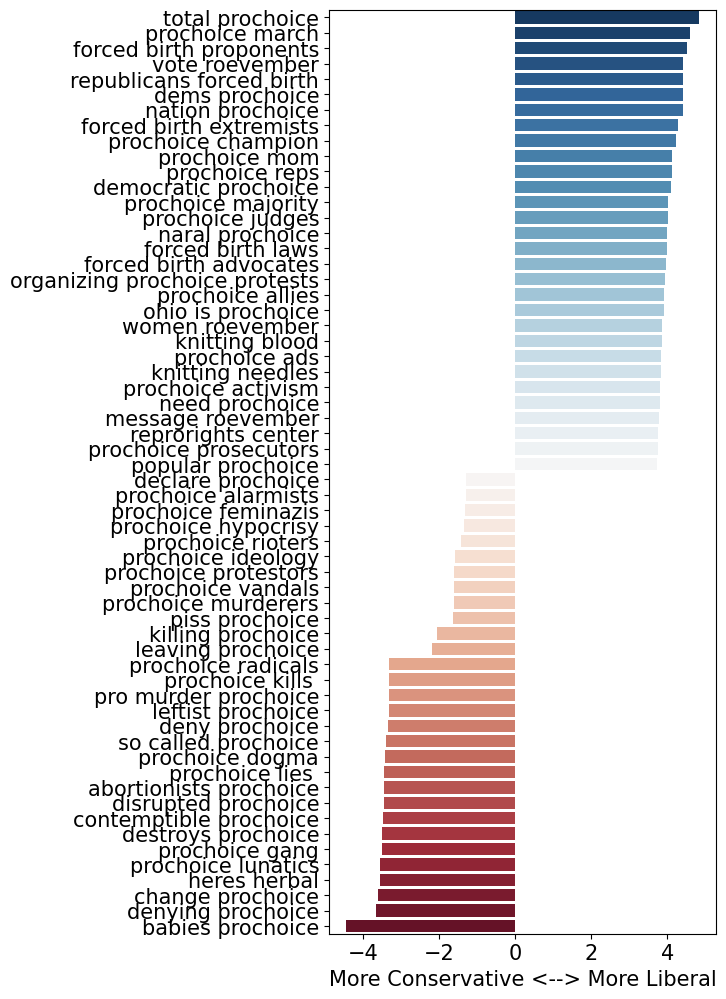

60


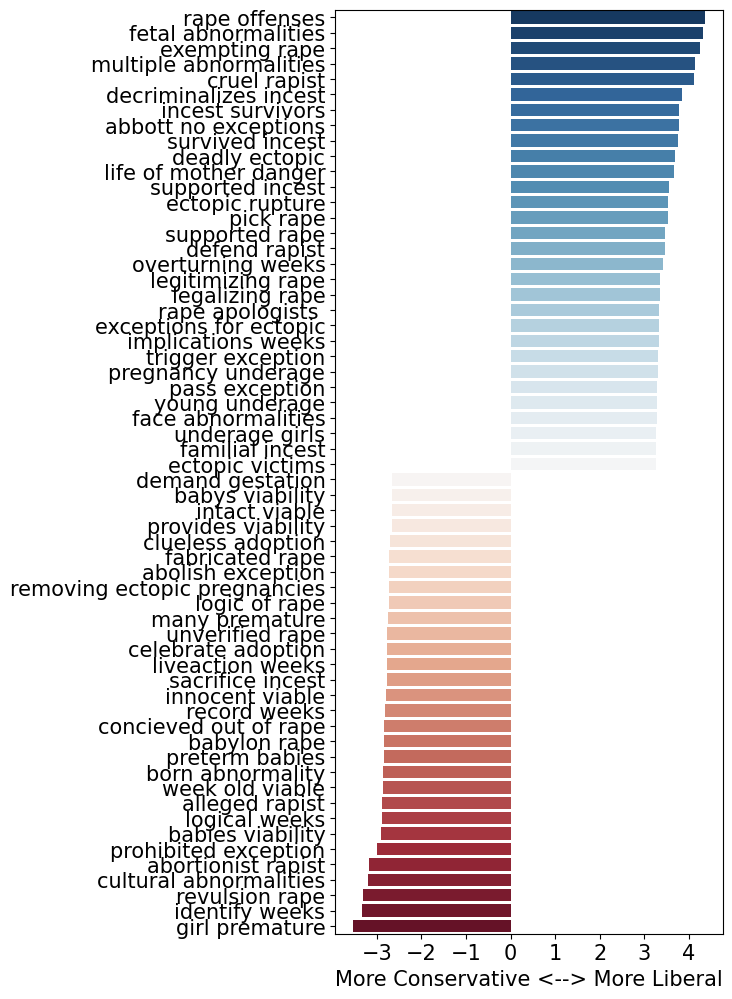

60


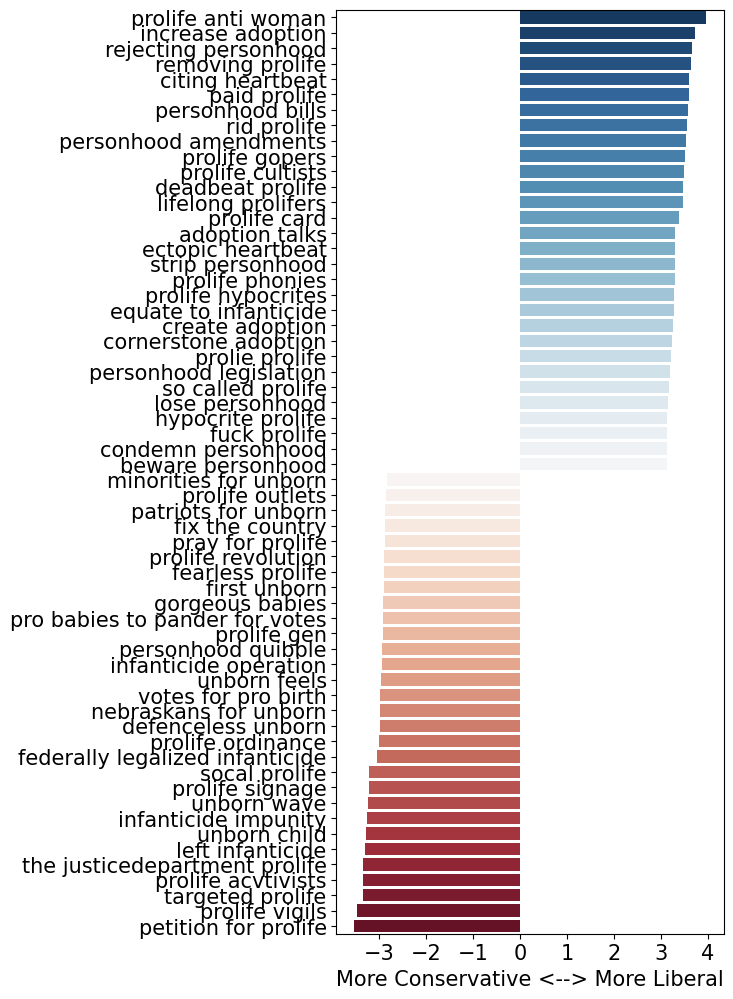

60


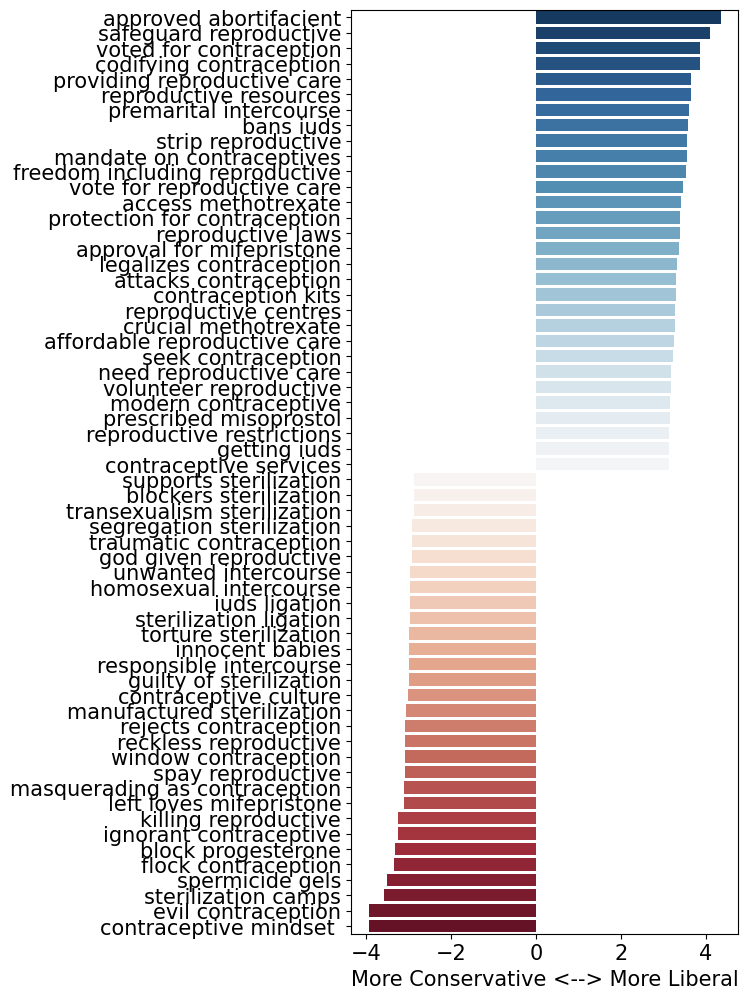

60


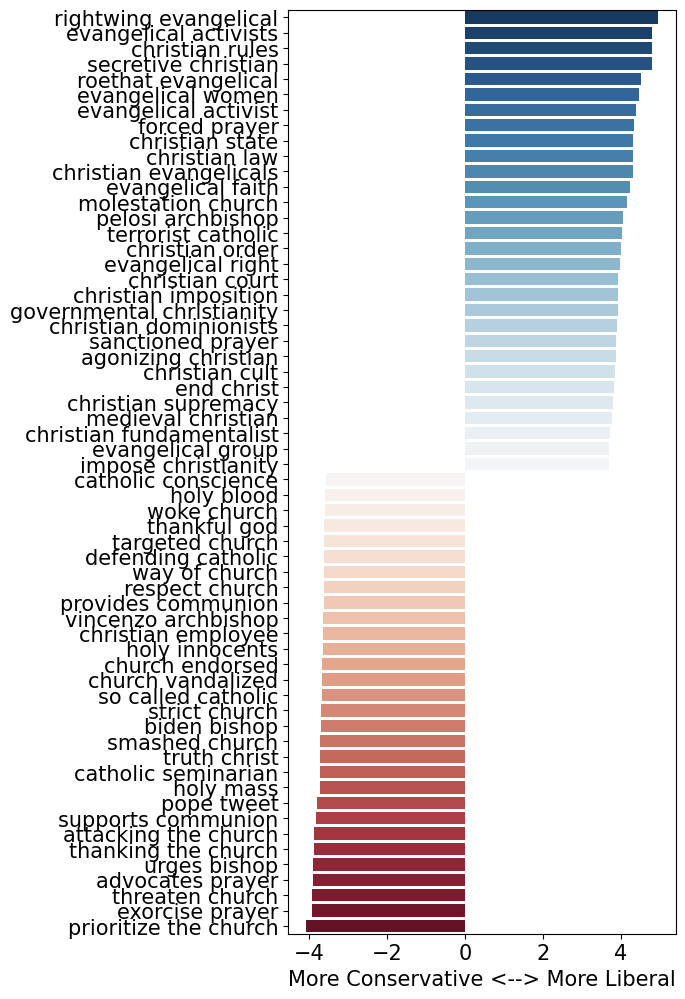

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

for iss in phrase_dict:
    plt.figure(figsize=(5,12))
    liberal_log_odds=phrase_dict[iss]['lib']
    conservative_log_odds=phrase_dict[iss]['con']
    liberal_sorted = sorted(liberal_log_odds.items(), key=lambda x: x[1], reverse=True)
    conservative_sorted = sorted(conservative_log_odds.items(), key=lambda x: x[1], reverse=True)

    liberal_hashtags, liberal_log_odds = zip(*liberal_sorted)
    conservative_hashtags, conservative_log_odds = zip(*conservative_sorted)
    
    
    c=pd.DataFrame(columns=['hashtag','value'])
    c['hashtag']=conservative_hashtags
    c['value']=conservative_log_odds
    c=c[-30:]
    
    l=pd.DataFrame(columns=['hashtag','value'])
    l['hashtag']=liberal_hashtags
    l['value']=liberal_log_odds
    l=l[:30]
    
    data=pd.concat([l,c])
    print(len(data))
    sns.barplot(data=data,x='value',y='hashtag',palette='RdBu_r')
    plt.xlabel('More Conservative <--> More Liberal',fontsize=15)
    plt.ylabel(None)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig(iss+'_frames_log_odds_si.pdf',dpi=300,bbox_inches='tight')
    plt.show()

## SI: Create comparison table

In [ ]:
name_map={'anger':'Anger',
         'toxicity_bin':'Toxicity',
         'obscene_bin':'Obscenity',
         'insult_bin':'Insult',
         'new_hate':'Hate'}
comp_df['expression']=comp_df['expression'].map(name_map)

In [ ]:
def rounder(x):
    return np.round(x,2)
def prounder(x):
    return np.round(x,4)

In [ ]:
for col in list(comp_df)[2:-1]:
    comp_df[col]=comp_df[col].apply(rounder)
comp_df['mann-whitney pval']=comp_df['mann-whitney pval'].apply(prounder)

In [ ]:
with pd.option_context("max_colwidth", 1000):
    print (comp_df.to_latex())

\begin{tabular}{lllrrrrrrr}
\toprule
{} &            issue & expression &  lib median &  con median &  lib mean &  con mean &  lib std &  con std &  mann-whitney pval \\
\midrule
0  &         Religion &      Anger &        0.41 &        0.29 &      0.38 &      0.27 &     0.16 &     0.16 &             0.0000 \\
1  &         Religion &   Toxicity &        0.15 &        0.08 &      0.14 &      0.09 &     0.08 &     0.07 &             0.0000 \\
2  &         Religion &  Obscenity &        0.06 &        0.01 &      0.06 &      0.02 &     0.06 &     0.03 &             0.0000 \\
3  &         Religion &     Insult &        0.03 &        0.00 &      0.03 &      0.01 &     0.04 &     0.02 &             0.0000 \\
4  &         Religion &       Hate &        0.06 &        0.05 &      0.06 &      0.06 &     0.05 &     0.06 &             0.0561 \\
5  &  Bodily Autonomy &      Anger &        0.29 &        0.35 &      0.30 &      0.35 &     0.09 &     0.15 &             0.0000 \\
6  &  Bodily Autonomy &

<ipython-input-17-5185614de4e5>:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print (comp_df.to_latex())


## SI: Boxplots comparing use of hostile expression and frames among liberals and conservatives

In [10]:
data_list=[rel_count,
autonomy_count,
fetal_rights_count,
health_count,
excep_count]
names=['rel','autonomy','fetal_rights','health','excep']
issue=['Religion','Bodily\nAutonomy','Fetal\nRights',"Women's\nHealth",'Exceptions']
ct=0
data_box=pd.DataFrame(columns=['Issue','Value','Ideology'])
day_lib=day_counts[day_counts['political_gen']==0]
day_con=day_counts[day_counts['political_gen']==1]
del day_lib['political_gen']
del day_con['political_gen']
for data in data_list:
    tmp_lib=day_lib.merge(data[data['political_gen']==0][['str_date','count']],on='str_date')
    tmp_con=day_con.merge(data[data['political_gen']==1][['str_date','count']],on='str_date')
    
    tmp_lib['frac_'+names[ct]]=tmp_lib['count']/tmp_lib['total']
    tmp_con['frac_'+names[ct]]=tmp_con['count']/tmp_con['total']
    
    new_tmp_lib=pd.DataFrame(columns=['Issue','Value','Ideology'])
    new_tmp_con=pd.DataFrame(columns=['Issue','Value','Ideology'])
    
    new_tmp_lib['Value']=tmp_lib['frac_'+names[ct]].tolist()
    new_tmp_con['Value']=tmp_con['frac_'+names[ct]].tolist()
    
    new_tmp_lib['Issue']=issue[ct]
    new_tmp_con['Issue']=issue[ct]
    
    new_tmp_lib['Ideology']='Liberal'
    new_tmp_con['Ideology']='Conservative'
    
    data_box=pd.concat([data_box,new_tmp_lib,new_tmp_con],ignore_index=True)
    ct+=1
data_box['Value']=data_box['Value'].astype(float)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Bodily
Autonomy_Liberal v.s. Bodily
Autonomy_Conservative: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.803e-81 U_stat=1.238e+05
Religion_Liberal v.s. Religion_Conservative: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.512e-99 U_stat=6.594e+03
Fetal
Rights_Liberal v.s. Fetal
Rights_Conservative: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.352e-93 U_stat=8.618e+03
Women's
Health_Liberal v.s. Women's
Health_Conservative: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.623e-95 U_stat=1.284e+05
Exceptions_Liberal v.s. Exceptions_Conservative: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.132e-03 U_stat=6.795e+04


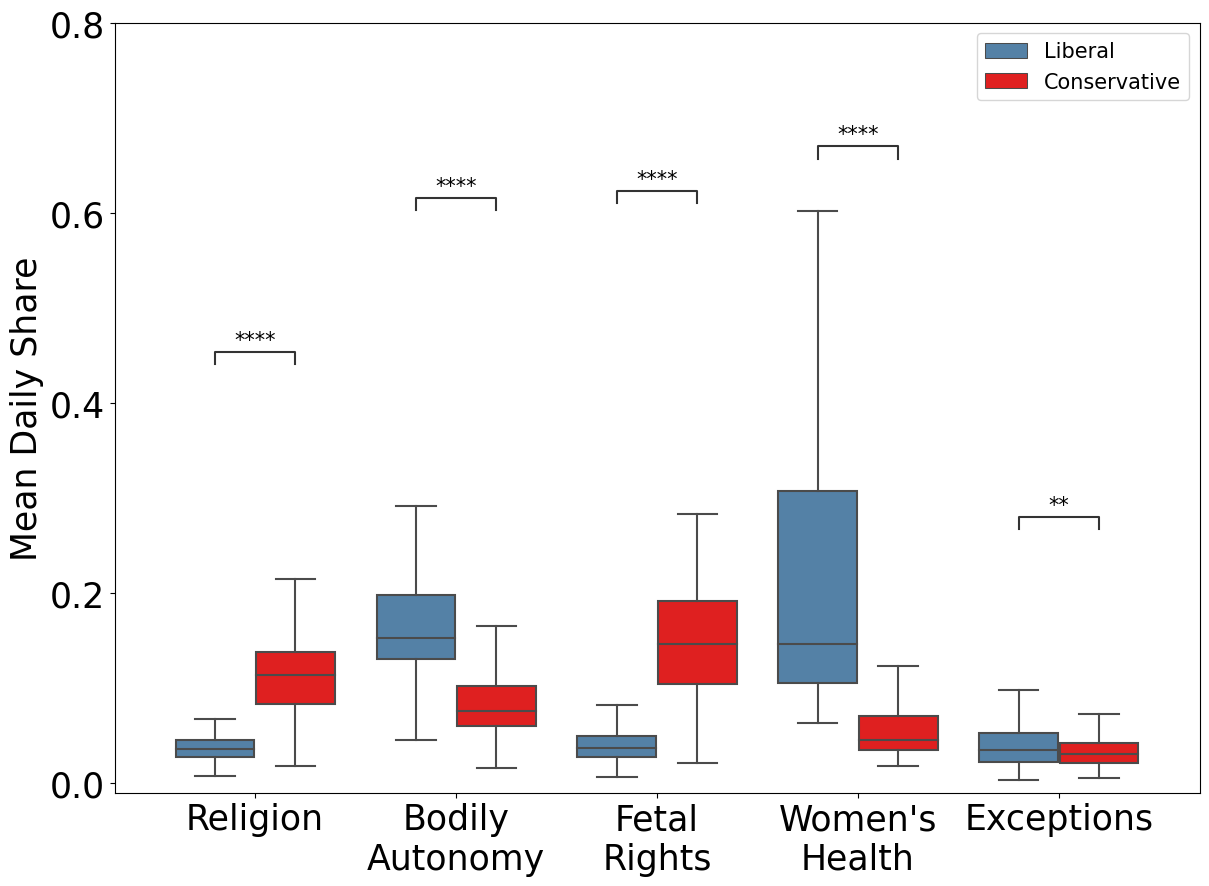

In [22]:
box_pairs=[(('Religion',"Liberal"),('Religion','Conservative')),
            (('Bodily\nAutonomy',"Liberal"),('Bodily\nAutonomy','Conservative')),
          (('Fetal\nRights',"Liberal"),('Fetal\nRights','Conservative')),
          (("Women's\nHealth","Liberal"),("Women's\nHealth",'Conservative')),
          (('Exceptions',"Liberal"),('Exceptions','Conservative'))]
plt.figure(figsize=(14,10))
ax = sns.boxplot(data=data_box, x='Issue', y='Value', hue='Ideology',showfliers=False,palette=['steelblue','red'])
add_stat_annotation(ax, data=data_box, x='Issue', y='Value', hue='Ideology', box_pairs=box_pairs,test='Mann-Whitney', loc='inside', verbose=2,fontsize=15)
#plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.legend(fontsize=15)
plt.yticks([0,0.2,0.4,0.6,0.8],fontsize=25)
plt.ylim((-0.01,0.80))
plt.xticks(fontsize=25)
plt.xlabel(None)
plt.ylabel('Mean Daily Share',fontsize=25)
plt.savefig('frame_usage_comparison.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
uncivil=['anger', 'toxicity_bin', 'obscene_bin', 'insult_bin','new_hate']

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Toxicity_Liberal v.s. Toxicity_Conservative: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.332e-14 U_stat=4.546e+04
Anger_Liberal v.s. Anger_Conservative: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.268e-02 U_stat=5.967e+04
Obscenity_Liberal v.s. Obscenity_Conservative: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.986e-30 U_stat=1.018e+05
Hate_Liberal v.s. Hate_Conservative: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.135e-40 U_stat=2.970e+04
Insult_Liberal v.s. Insult_Conservative: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.135e-06 U_stat=8.266e+04


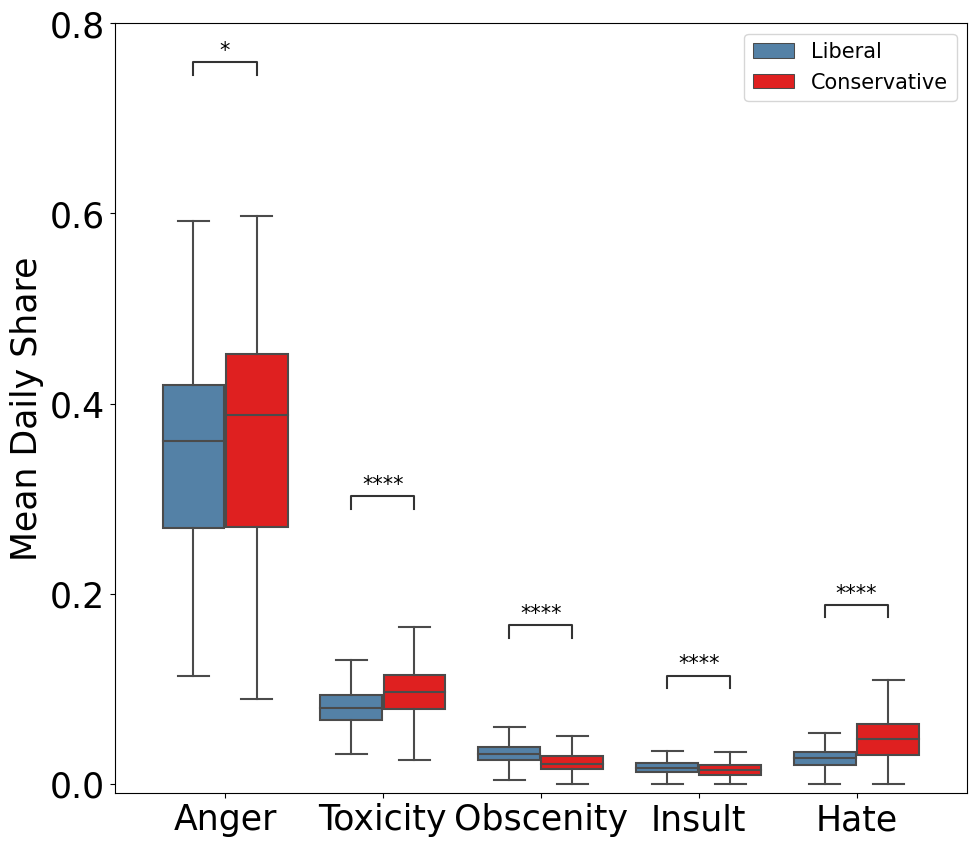

In [49]:
import seaborn as sns
from statannot import add_stat_annotation
name_map={'anger':'Anger',
        'new_hate':'Hate',
         'toxicity_bin':'Toxicity',
         'obscene_bin':'Obscenity',
         'insult_bin':'Insult'}
all_df=pd.DataFrame()
for e in uncivil:
    x = "emotion"
    y = "value"
    hue = "ideo"
    tmp_df=pd.DataFrame(columns=['emotion','value','ideo'])
    tmp_df['emotion']=[name_map[e]]*(len(lib_mean)+len(con_mean))
    tmp_df['value']=lib_mean[e].tolist()+con_mean[e].tolist()
    tmp_df['ideo']=['Liberal']*len(lib_mean)+['Conservative']*len(con_mean)
    all_df=pd.concat([all_df,tmp_df])
box_pairs=[(('Anger',"Liberal"),('Anger','Conservative')),
            (('Hate',"Liberal"),('Hate','Conservative')),
          (('Toxicity',"Liberal"),('Toxicity','Conservative')),
          (('Obscenity',"Liberal"),('Obscenity','Conservative')),
          (('Insult',"Liberal"),('Insult','Conservative'))]
plt.figure(figsize=(11,10))
ax = sns.boxplot(data=all_df, x=x, y=y, hue=hue,showfliers=False,palette=['steelblue','red'])
add_stat_annotation(ax, data=all_df, x=x, y=y, hue=hue, box_pairs=box_pairs,
                    test='Mann-Whitney', loc='inside', verbose=2,fontsize=15)
#plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.legend(fontsize=15)
plt.yticks([0,0.2,0.4,0.6,0.8],fontsize=25)
plt.ylim((-0.01,0.80))
plt.xticks(fontsize=25)
plt.xlabel(None)
plt.ylabel('Mean Daily Share',fontsize=25)
plt.savefig('uncivil_comparison.pdf', dpi=300, bbox_inches='tight')
plt.show()